# Predicting Diabetes Using Linear Regression Model

#### **Data:**
For this module we used the sklearn diabetes built-in dataset.

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  Number of Instances: 442

  Number of Attributes: First 10 columns are numeric predictive values

  Target: Column 11 is a quantitative measure of disease progression one year after baseline

  Attribute Information:
  
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).



## Import Libraries

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)

### Load the data

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [4]:
features=diabetes.feature_names
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
x=diabetes.data
x

array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
       [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
       [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
       ...,
       [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
       [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
       [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]])

In [6]:
y=diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
x.shape,y.shape

((442, 10), (442,))

## Splitting the data into Training set and Testing set

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Check if Features Rescaling is needed

In [17]:
print(f'Ranges of features:{np.ptp(x_train,axis=0)}')

Ranges of features:[0.22 0.1  0.26 0.24 0.26 0.31 0.28 0.26 0.26 0.27]


No Rescaling is needed

## Building The Model

In [28]:
sgdr=SGDRegressor(max_iter=100000)
sgdr.fit(x_train,y_train)
print(sgdr)
print(f'number of iterationcompleted:{sgdr.n_iter_},number of weight_updates:{sgdr.t_}')

SGDRegressor(max_iter=100000)
number of iterationcompleted:8284,number of weight_updates:2559757.0


## View Model Parameters

In [29]:
w=sgdr.coef_
b=sgdr.intercept_
print(f'model parameters:w:{w},   b:{b}')

model parameters:w:[ -25.79 -154.67  498.55  264.11  -31.72 -111.35 -222.89  123.42  427.5
   94.08],   b:[153.36]


## Make Predictions

In [30]:
# Using the testing set
y_pred=sgdr.predict(x_test)

## Model Metrics

In [31]:
print('Mean squared error (MSE): ' ,metrics.mean_squared_error(y_test, y_pred))
print('Coefficient of determination: ', metrics.r2_score(y_test,y_pred))

Mean squared error (MSE):  3019.752264623616
Coefficient of determination:  0.40806481734036315


## Comparing Some Predicted results with some target values

In [32]:
# eg. second 10 values of the testing set
print(f'predictions: {y_pred[11:20]}')
print(f'targets: {y_test[11:20]}')


predictions: [182.53 113.05  93.53 241.3  100.19 148.73  70.76 100.04 216.22]
targets: [174. 129.  74. 264.  49.  86.  75. 101. 155.]


## Visualizing the results

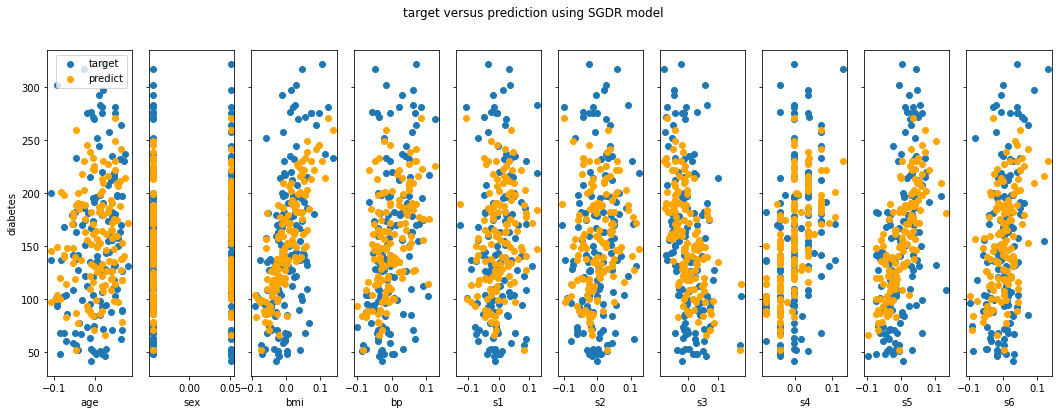

In [33]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,10,figsize=(18,6),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(features[i])
    ax[i].scatter(x_test[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("diabetes"); ax[0].legend();
fig.suptitle("target versus prediction using SGDR model")
plt.show()